In [1]:
import pathlib
import numpy as np
from fytok.Tokamak import Tokamak
from spdm.view import View as sp_view

input_path = pathlib.Path("./data/")


2023-11-06 14:36:40,166 [   fytok]     INFO: 
#######################################################################################################################
    ______      _____     _
   / ____/_  __|_   _|__ | | __
  / /_  / / / /  | |/ _ \| |/ /
 / __/ / /_/ /   | | (_) |   <
/_/    \__, /    |_|\___/|_|\_\
      /____/

 Copyright (c) 2021-present Zhi YU (Institute of Plasma Physics Chinese Academy of Sciences)
            
 url: https://gitee.com/openfusion/fytok_tutorial 
      https://github.com/fusion-yun/fytok_tutorial

 ontology = imas/3, version = 0.2.1 ( extension=0.2.2.dev11+g706f667, imas_version=v3_38_1_dirty ) 

 Run by salmon on Surface at 2023-11-06T14:36:40.166925

#######################################################################################################################



In [2]:

tokamak = Tokamak(f"file+iterprofiles://{next(input_path.glob('*ASTRA.xls')).absolute().as_posix()}",
                  f"file+geqdsk://{next(input_path.glob('**/g*.txt')).absolute().as_posix()}",
                  device="iter",
                  transport_solver={"code":  {"name": "fytrans",
                                              "parameters": {
                                                  "rho_tor_norm": np.linspace(0.01, 0.995, 128),
                                                  "bvp_rms_mask": [0.96],
                                                  "hyper_diff": 0.0001
                                              }}})

tokamak.transport_solver.refresh(
    equation={
        "electrons/density_thermal": {
            "profile": 3.0e19,
            "boundary_condition": [{"identifier": {"index": 4}, "value": [0]}, {"identifier": {"index": 1}, "value": [4.0e19]}]},
        "ion/T/density_thermal": {
            "profile": 1.5e19,
            "boundary_condition": [{"identifier": {"index": 4}, "value": [0]}, {"identifier": {"index": 1}, "value": [2.0e19]}]},
        "ion/D/density_thermal": {
            "profile": 1.5e19,
            "boundary_condition": [{"identifier": {"index": 4}, "value": [0]}, {"identifier": {"index": 1}, "value": [2.0e19]}]},
    },
    equilibrium=tokamak.equilibrium,
    core_transport=tokamak.core_transport,
    core_sources=tokamak.core_sources,
)

2023-11-06 14:36:40,287 [   fytok]     INFO: Load module spdm.plugins.data.plugin_xml


2023-11-06 14:36:40,502 [   fytok]     INFO: Load module spdm.plugins.data.plugin_iterprofiles
2023-11-06 14:36:40,562 [   fytok]     INFO: Load module spdm.plugins.data.plugin_geqdsk
2023-11-06 14:36:40,633 [   fytok]     INFO: Load module fytok.plugins.transport_solver_numerics.fytrans
2023-11-06 14:36:40,960 [   fytok]     INFO: Load module fytok.plugins.equilibrium.eq_analyze
2023-11-06 14:36:45,012 [   fytok]     INFO: Solve transport equations [3] : electrons/density_thermal,ion/T/density_thermal,ion/D/density_thermal
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          8.61e-04       3.96e-06          128             0       
Solved in 1 iterations, number of nodes 128. 
Maximum relative residual: 8.61e-04 
Maximum boundary residual: 3.96e-06
2023-11-06 14:36:45,306 [   fytok]    DEBUG: /home/salmon/workspace/fytok/python/fytok/plugins/transport_solver_numerics/fytrans.py:527:solve: Solve BVP success: The algorithm converged to the desire

2023-11-06 14:36:45,322 [   fytok]     INFO: Load module spdm.view.view_matplotlib


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


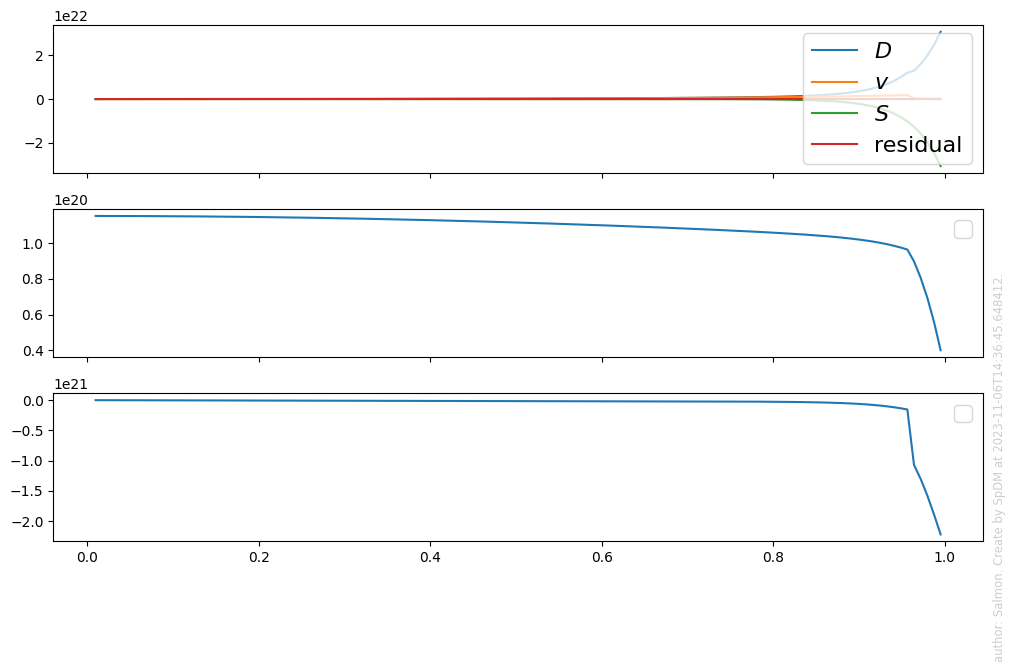

In [3]:
solver_1d = tokamak.transport_solver.time_slice.current.solver_1d
equ = solver_1d.equation[0]
a, b, c, d, e, f, g,*_ = equ.coefficient
x = solver_1d.grid.rho_tor_norm
y       = equ.primary_quantity.profile
yp      = equ.primary_quantity.d_dr
flux    = equ.primary_quantity.flux
dflux   = equ.primary_quantity.dflux_dr
fig = sp_view.plot([
    # * equ.coefficient,
    [
        (d*yp, "$D$"),
        (e*y,   "$v$"),
        # (flux,   f"$\Gamma$"),
        ((c*(f - g * y)).I, r"$S$"),  # $\int c*(f - g \cdot y)$
        # ((-d*yp+e*y).I, r"$\Gamma$"),
        (-d*yp+e*y-(c*(f - g * y)).I, "residual"),

    ],
    y, yp

    # [

    #     (dflux, {"label": r"$d\Gamma$"}),
    #     # (Function(flux, x).d(), r"$d\Gamma$"),
    #     ((c*(f - g * y)), r"$c*(f - g \cdot y)$"),
    # ],
],
    x_axis=x)

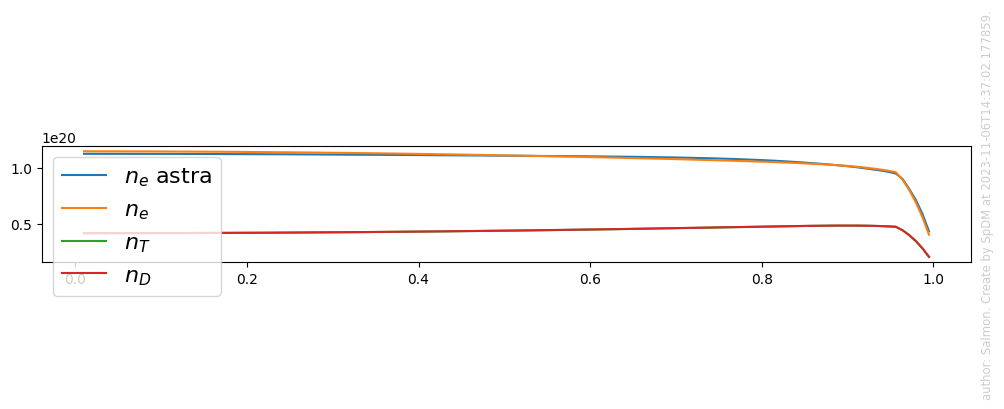

In [9]:
fig = sp_view.plot([
    [
        (tokamak.core_profiles.time_slice.current.profiles_1d.electrons.density_thermal, r"$n_e$ astra"),
        # (tokamak.core_profiles.time_slice.current.profiles_1d.ion["D"].density_thermal, r"$n_D$ astra"),
        (solver_1d.equation[0].primary_quantity.profile, r"$n_e$"),
        (solver_1d.equation[1].primary_quantity.profile, r"$n_T$"),
        (solver_1d.equation[2].primary_quantity.profile, r"$n_D$"),

    ]
],
    x_axis=solver_1d.grid.rho_tor_norm
)